In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmi-dataset-linear-regression/bmi.csv


<a class="anchor" id="0"></a>

# **Linear Regression Tutorial in Python**

Hello friends,

Linear Regression is a very simple and easy to understand ML algorithm. 
Here, I build a Linear Regression model to predict BMI values based on the given features.

So, let's get started..


<a class="anchor" id="0.1"></a>
# **Table of Contents**

1. [Introduction to Linear Regression algorithm](#1)
2. [Python Library](#2)
3. [Load dataset](#3)
4. [Normal Equation (closed-form OLS)](#4)

# **1. Introduction to Linear Regression algorithm** <a class="anchor" id="1"></a>
Linear regression is a method to model the relationship between
* a dependent variable y and
* one or more independent variables x,
by fitting the best straight line (or hyperplane) through the data.

# Formula: 
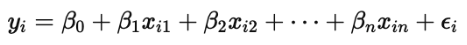
# BMI Linear Regression Model:
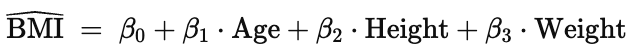

* y → target values (e.g., BMI)
* x → features (Height, Weight, etc.)
* beta → coefficients we want to calculate
* e → error term

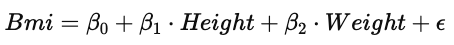
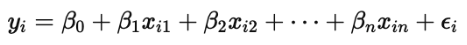

# **2. Python Library** <a class="anchor" id="2"></a>

In [2]:
import pandas as pd
import numpy as np

# **3. Load dataset** <a class="anchor" id="3"></a>

In [3]:
# ---------- Load dataset ----------
df = pd.read_csv("/kaggle/input/bmi-dataset-linear-regression/bmi.csv")

# **4. Data Description** <a class="anchor" id="4"></a>

In [4]:
# Show the first 5 rows
print(df)

     Age  Height  Weight        Bmi       BmiClass
0     61    1.85  109.30  31.935720  Obese Class 1
1     60    1.71   79.02  27.023700     Overweight
2     60    1.55   74.70  31.092612  Obese Class 1
3     60    1.46   35.90  16.841809    Underweight
4     60    1.58   97.10  38.896010  Obese Class 2
..   ...     ...     ...        ...            ...
736   34    1.86   95.70  27.662157     Overweight
737   44    1.91  106.90  29.302925     Overweight
738   25    1.82   88.40  26.687598     Overweight
739   35    1.88   98.50  27.868945     Overweight
740   45    1.93  109.90  29.504148     Overweight

[741 rows x 5 columns]


In [5]:
# Show general info about the dataset
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB
None


In [6]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
              Age      Height      Weight         Bmi
count  741.000000  741.000000  741.000000  741.000000
mean    31.618084    1.709427   78.412497   26.365427
std     11.655466    0.085974   32.254547    9.223191
min     15.000000    1.460000   25.900000   12.150497
25%     22.000000    1.670000   63.000000   22.129740
50%     29.000000    1.721000   72.900000   24.132412
75%     40.000000    1.751000   83.300000   27.249306
max     61.000000    2.070000  270.000000   66.301350



* bmi_df[['Age', 'Height', 'Weight']] → selects only the columns **Age, Height, Weight** from DataFrame.
* **.values** → **converts that DataFrame slice into a NumPy array (matrix)**, which we can use in linear algebra operations.
* After this, X is your feature matrix of shape (m, 3):
 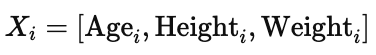
* **m =** number of rows (observations in your dataset).
* **3 =** number of features (Age, Height, Weight).



In [7]:
# Features (Age, Height, Weight) and target (BMI)
bmi_df = df
print(bmi_df)
X = bmi_df[['Age', 'Height', 'Weight']].values
print(X)
X = bmi_df[['Age', 'Height', 'Weight']].values.reshape(-1, 1)
print(X)

     Age  Height  Weight        Bmi       BmiClass
0     61    1.85  109.30  31.935720  Obese Class 1
1     60    1.71   79.02  27.023700     Overweight
2     60    1.55   74.70  31.092612  Obese Class 1
3     60    1.46   35.90  16.841809    Underweight
4     60    1.58   97.10  38.896010  Obese Class 2
..   ...     ...     ...        ...            ...
736   34    1.86   95.70  27.662157     Overweight
737   44    1.91  106.90  29.302925     Overweight
738   25    1.82   88.40  26.687598     Overweight
739   35    1.88   98.50  27.868945     Overweight
740   45    1.93  109.90  29.504148     Overweight

[741 rows x 5 columns]
[[ 61.     1.85 109.3 ]
 [ 60.     1.71  79.02]
 [ 60.     1.55  74.7 ]
 ...
 [ 25.     1.82  88.4 ]
 [ 35.     1.88  98.5 ]
 [ 45.     1.93 109.9 ]]
[[ 61.  ]
 [  1.85]
 [109.3 ]
 ...
 [ 45.  ]
 [  1.93]
 [109.9 ]]


bmi_df['Bmi'] → selects the Bmi column (the target we want to predict).


* .values → converts it to a NumPy array.
* .reshape(-1, 1) → makes sure it is a column vector (shape (m, 1)) instead of a flat array (m,).

In NumPy, **.reshape(rows, cols)** changes the shape of an array without changing its data.
(-1, 1) means:
* -1 → figure out automatically how many rows I need
* 1 → make it one column


So **.reshape(-1, 1)** turns a flat **1D array** into a **2D column vector.**

In [8]:
y = bmi_df['Bmi'].values.reshape(-1, 1)

- np.ones((X.shape[0], 1)) = column of ones → creating arrays all ones

- X = your features (Age, Height, Weight)

- np.c_ = shorthand for column_stack

Result → a new matrix X_b with shape (m, 4)

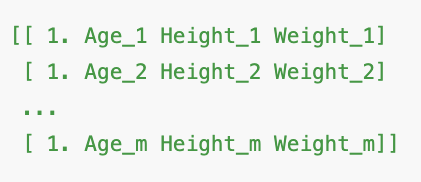

In [9]:
# Add column of 1s for intercept (bias)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [10]:
# Normal Equation: β = (XᵀX)⁻¹ Xᵀy
#beta_hat = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
#beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print results
#print("Estimated β vector:", beta_hat.ravel())
#print("β0 (intercept):", beta_hat[0, 0])
#print("β1 (Age):", beta_hat[1, 0])
#print("β2 (Height):", beta_hat[2, 0])
#print("β3 (Weight):", beta_hat[3, 0])

In [11]:
import numpy as np

# Select features and target
X = df[['Age', 'Height', 'Weight']].values
y = df['Bmi'].values.reshape(-1, 1)

# Add intercept term (bias)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Normal Equation: θ = (XᵀX)⁻¹ Xᵀy
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Coefficients (θ):", theta_best.ravel())
print("Intercept:", theta_best[0,0])
print("Feature weights:", theta_best[1:].ravel())


Coefficients (θ): [ 4.54195228e+01  1.81076140e-02 -2.60681543e+01  3.17997648e-01]
Intercept: 45.41952278386879
Feature weights: [ 1.81076140e-02 -2.60681543e+01  3.17997648e-01]


# **5. Normal Equation (closed-form OLS)** <a class="anchor" id="6"></a>

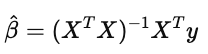

<div style="font-size:15px;">

* y = what we want to predict (BMI).
  
* .values → converts pandas column to NumPy array.

* .reshape(-1,1) → turns it into a column vector (shape = rows × 1).

* X = our predictors (Height and Weight).

* Shape = rows × 2.

</div>

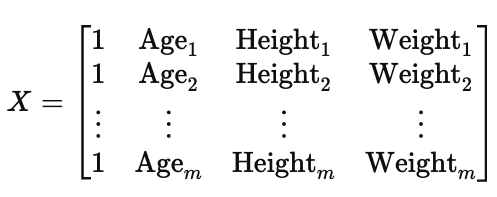
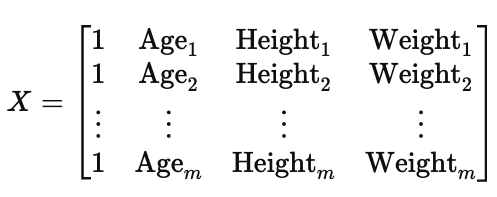

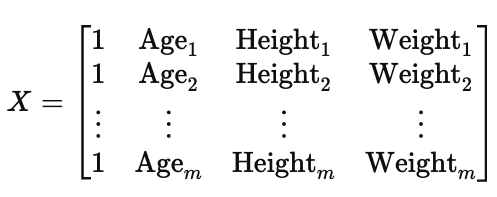
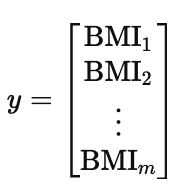

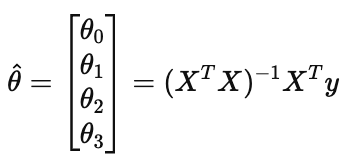

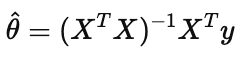
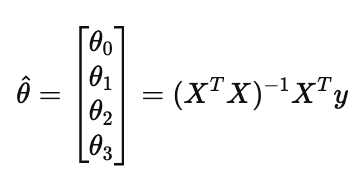

In [12]:
# Step 1: Pandas Series
y = df["Bmi"].head(6)
print("=== Pandas.Series  ->  df['Bmi'].head(6)")
print("=== Type:",  type(y))
print("=== Shape:", y.shape, "\n")
print(y)

#0    31.935720
#1    27.023700

=== Pandas.Series  ->  df['Bmi'].head(6)
=== Type: <class 'pandas.core.series.Series'>
=== Shape: (6,) 

0    31.935720
1    27.023700
2    31.092612
3    16.841809
4    38.896010
5    27.126295
Name: Bmi, dtype: float64


In [13]:
# Step 2: Pandas Series to NumPy 1D array
y = df["Bmi"].values
print("=== Pandas.Series to NumPy 1D array -> df['Bmi'].values[:6]")
print("=== Type:", type(y))
print("=== Shape:", y.shape, "\n")
print(y)
# [31.9357195  27.0236996  31.09261186 16.84180897 38.89601025 27.12629527]

=== Pandas.Series to NumPy 1D array -> df['Bmi'].values[:6]
=== Type: <class 'numpy.ndarray'>
=== Shape: (741,) 

[31.9357195  27.0236996  31.09261186 16.84180897 38.89601025 27.12629527
 25.37024221 28.83991347 16.88872209 31.26399713 27.12287541 25.40138408
 28.80273121 16.65972511 27.11945556 25.43252595 28.76554895 35.91836735
 31.9259734  16.65972511 38.7109375  27.1160357  25.46366782 28.72836668
 29.98299118 16.70600213 30.40123457 38.76428939 26.79826933 25.19749667
 28.36045307 32.11195241 55.3633218  16.48100804 26.81179016 25.24537465
 30.13001042 16.5266618  38.69449481 26.80840995 29.073312   16.30557182
 38.75171468 26.80502975 25.30693205 28.515625   16.35061484 39.07644259
 26.80164954 25.33771075 26.42176973 16.17777778 29.77959184 37.12802768
 26.48935815 25.07436452 27.87026027 41.66666667 17.52781588 27.28744025
 16.22222222 31.57490548 40.10015967 26.40248588 25.02028123 27.75135421
 29.296875   17.1875     28.96341463 16.05192755 38.84225978 26.09657815
 24.761936

In [14]:
# Step 3: NumPy 2D
y = df["Bmi"].values.reshape(-1, 1) # превращаем в колонку (m,1) 
print("=== NumPy 2D array (df['Bmi'].values.reshape(-1,1)) ")
print("Type:", type(y))
print("Shape:", y.shape , "\n")
print(y)

#[[31.9357195 ]
# [27.0236996 ]
# [31.09261186]
# [16.84180897]
# [38.89601025]
# [27.12629527]]

X = bmi_df[['Age', 'Height', 'Weight']].values
X_raw = df[["Height", "Weight"]].values[:6]
print(X_raw)
print("Type:", type(X_raw))
print("Shape:", X_raw.shape)

x = np.column_stack([np.ones(X_raw.shape[0]), X_raw])
print(x)
print("Type:", type(x))
print("Shape:", x.shape)

=== NumPy 2D array (df['Bmi'].values.reshape(-1,1)) 
Type: <class 'numpy.ndarray'>
Shape: (741, 1) 

[[31.9357195 ]
 [27.0236996 ]
 [31.09261186]
 [16.84180897]
 [38.89601025]
 [27.12629527]
 [25.37024221]
 [28.83991347]
 [16.88872209]
 [31.26399713]
 [27.12287541]
 [25.40138408]
 [28.80273121]
 [16.65972511]
 [27.11945556]
 [25.43252595]
 [28.76554895]
 [35.91836735]
 [31.9259734 ]
 [16.65972511]
 [38.7109375 ]
 [27.1160357 ]
 [25.46366782]
 [28.72836668]
 [29.98299118]
 [16.70600213]
 [30.40123457]
 [38.76428939]
 [26.79826933]
 [25.19749667]
 [28.36045307]
 [32.11195241]
 [55.3633218 ]
 [16.48100804]
 [26.81179016]
 [25.24537465]
 [30.13001042]
 [16.5266618 ]
 [38.69449481]
 [26.80840995]
 [29.073312  ]
 [16.30557182]
 [38.75171468]
 [26.80502975]
 [25.30693205]
 [28.515625  ]
 [16.35061484]
 [39.07644259]
 [26.80164954]
 [25.33771075]
 [26.42176973]
 [16.17777778]
 [29.77959184]
 [37.12802768]
 [26.48935815]
 [25.07436452]
 [27.87026027]
 [41.66666667]
 [17.52781588]
 [27.28744025]

# **6. Gradient Descent** <a class="anchor" id="7"></a>

# **7. Loss Function** <a class="anchor" id="5"></a>

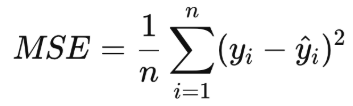

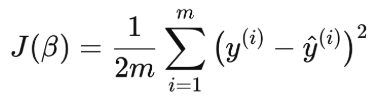

**Sum of Squared Errors (SSE)**

**MLE (Maximum Likelihood Estimation)**

**R² (coefficient of determination)**

**Adjusted R²**

**F-statistics**

**P-value**

(741, 3)
[[31.9357195 ]
 [27.0236996 ]
 [31.09261186]
 [16.84180897]
 [38.89601025]
 [27.12629527]
 [25.37024221]
 [28.83991347]
 [16.88872209]
 [31.26399713]
 [27.12287541]
 [25.40138408]
 [28.80273121]
 [16.65972511]
 [27.11945556]
 [25.43252595]
 [28.76554895]
 [35.91836735]
 [31.9259734 ]
 [16.65972511]
 [38.7109375 ]
 [27.1160357 ]
 [25.46366782]
 [28.72836668]
 [29.98299118]
 [16.70600213]
 [30.40123457]
 [38.76428939]
 [26.79826933]
 [25.19749667]
 [28.36045307]
 [32.11195241]
 [55.3633218 ]
 [16.48100804]
 [26.81179016]
 [25.24537465]
 [30.13001042]
 [16.5266618 ]
 [38.69449481]
 [26.80840995]
 [29.073312  ]
 [16.30557182]
 [38.75171468]
 [26.80502975]
 [25.30693205]
 [28.515625  ]
 [16.35061484]
 [39.07644259]
 [26.80164954]
 [25.33771075]
 [26.42176973]
 [16.17777778]
 [29.77959184]
 [37.12802768]
 [26.48935815]
 [25.07436452]
 [27.87026027]
 [41.66666667]
 [17.52781588]
 [27.28744025]
 [16.22222222]
 [31.57490548]
 [40.10015967]
 [26.40248588]
 [25.02028123]
 [27.75135421]
 

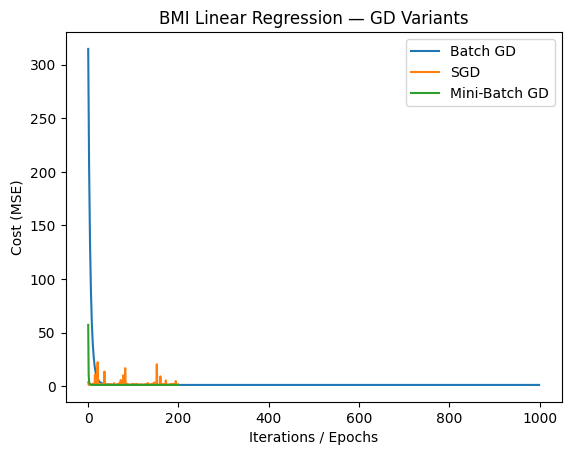

R^2 (Mini-Batch model): 0.9731


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Prepare data (expects a pandas DataFrame named bmi_df) ====
# Features and target
X_raw = bmi_df[['Age', 'Height', 'Weight']].values.astype(float)   # shape (m, 3)
print(X_raw.shape)
y = bmi_df[['Bmi']].values              # shape (m, 1)
print(y)
y1 = bmi_df['Bmi'].values.reshape(-1,1)              # shape (m, 1)
print(y1)
m, n = X_raw.shape
print(m, n)
# Standardize features (no scaling for y)
mu = X_raw.mean(axis=0, keepdims=True)      # (1, n)
sigma = X_raw.std(axis=0, keepdims=True)    # (1, n)
X = (X_raw - mu) / sigma

# Add intercept
X_b = np.c_[np.ones((m, 1)), X]             # shape (m, n+1)

# ==== Cost and helpers ====
def compute_cost(X, y, theta):
    m = len(y)
    error = X @ theta - y
    return (error.T @ error / (2*m)).item()

def theta_to_original_units(theta_scaled, mu, sigma):
    """
    Given theta learned on standardized X, convert to original feature units.
    theta_scaled: (n+1, 1) for [bias, z1, z2, ...] where z_j = (x_j - mu_j)/sigma_j
    Returns beta_orig: (n+1, 1) s.t. y ≈ beta0 + sum_j beta_j * x_j
    """
    beta = np.zeros_like(theta_scaled)       # (n+1, 1)
    beta[1:] = theta_scaled[1:] / sigma.T    # coef_j = theta_j / sigma_j
    beta0 = theta_scaled[0] - (mu @ beta[1:])   # intercept = theta0 - sum(mu_j * coef_j)
    beta[0] = beta0
    return beta

# ==== Gradient Descent Variants ====
def batch_gradient_descent(X, y, lr=0.1, n_iters=1000):
    m, d = X.shape
    theta = np.random.randn(d, 1)
    cost_history = []
    for _ in range(n_iters):
        gradients = (1/m) * (X.T @ (X @ theta - y))
        theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

def stochastic_gradient_descent(X, y, lr=0.1, n_epochs=50):
    m, d = X.shape
    theta = np.random.randn(d, 1)
    cost_history = []
    for epoch in range(n_epochs):
        # shuffle indices for true SGD
        idx = np.random.permutation(m)
        for i in idx:
            xi = X[i:i+1]           # (1, d)
            yi = y[i:i+1]           # (1, 1)
            gradients = xi.T @ (xi @ theta - yi)   # (d, 1)
            theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

def mini_batch_gradient_descent(X, y, lr=0.1, n_epochs=50, batch_size=32):
    m, d = X.shape
    theta = np.random.randn(d, 1)
    cost_history = []
    for _ in range(n_epochs):
        idx = np.random.permutation(m)
        Xs, ys = X[idx], y[idx]
        for start in range(0, m, batch_size):
            xb = Xs[start:start+batch_size]
            yb = ys[start:start+batch_size]
            gradients = (1/len(xb)) * (xb.T @ (xb @ theta - yb))
            theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# ==== Run all methods ====
theta_bgd_s, cost_bgd = batch_gradient_descent(X_b, y, lr=0.1, n_iters=1000)
theta_sgd_s, cost_sgd = stochastic_gradient_descent(X_b, y, lr=0.05, n_epochs=200)
theta_mbgd_s, cost_mbgd = mini_batch_gradient_descent(X_b, y, lr=0.08, n_epochs=200, batch_size=64)

# Convert back to original feature units (intercept, Age, Height, Weight)
beta_bgd = theta_to_original_units(theta_bgd_s, mu, sigma)
beta_sgd = theta_to_original_units(theta_sgd_s, mu, sigma)
beta_mbgd = theta_to_original_units(theta_mbgd_s, mu, sigma)

print("== Coefficients in ORIGINAL UNITS ==")
print("Batch GD:       β0={:.4f}, β_Age={:.4f}, β_Height={:.4f}, β_Weight={:.4f}"
      .format(beta_bgd[0,0], beta_bgd[1,0], beta_bgd[2,0], beta_bgd[3,0]))
print("SGD:            β0={:.4f}, β_Age={:.4f}, β_Height={:.4f}, β_Weight={:.4f}"
      .format(beta_sgd[0,0], beta_sgd[1,0], beta_sgd[2,0], beta_sgd[3,0]))
print("Mini-Batch GD:  β0={:.4f}, β_Age={:.4f}, β_Height={:.4f}, β_Weight={:.4f}"
      .format(beta_mbgd[0,0], beta_mbgd[1,0], beta_mbgd[2,0], beta_mbgd[3,0]))

# ==== (Optional) Closed-form solution for reference, no scaling needed ====
X_ne = np.c_[np.ones((m, 1)), X_raw]         # original units
theta_ne = np.linalg.pinv(X_ne.T @ X_ne) @ (X_ne.T @ y)   # (n+1, 1)
print("Normal Eq.:     β0={:.4f}, β_Age={:.4f}, β_Height={:.4f}, β_Weight={:.4f}"
      .format(theta_ne[0,0], theta_ne[1,0], theta_ne[2,0], theta_ne[3,0]))

# ==== Plot cost convergence ====
plt.plot(cost_bgd, label="Batch GD")
plt.plot(cost_sgd, label="SGD")
plt.plot(cost_mbgd, label="Mini-Batch GD")
plt.xlabel("Iterations / Epochs")
plt.ylabel("Cost (MSE)")
plt.title("BMI Linear Regression — GD Variants")
plt.legend()
plt.show()

# ==== Quick R^2 check (using the Mini-Batch model in original units) ====
y_pred = X_ne @ beta_mbgd
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y.mean())**2)
r2 = 1 - ss_res/ss_tot
print(f"R^2 (Mini-Batch model): {r2:.4f}")


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# X и y из датасета
X = bmi_df[['Age','Height','Weight']].values
y = bmi_df[['Bmi']].values

# Делим: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучаем модель на train
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказываем на test
y_pred = model.predict(X_test)

# Метрики
print("R^2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R^2: 0.9814173776670392
RMSE: 1.1525096399167376


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ==== 1. Данные ====
X = bmi_df[['Age','Height','Weight']].values
y = bmi_df[['Bmi']].values

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==== 2. LinearRegression (OLS) ====
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)
print("LinearRegression:")
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)
print("R^2:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))

# ==== 3. SGDRegressor (градиентный спуск) ====
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)
sgd.fit(X_train, y_train.ravel())   # ravel() → делает (m,) как требует SGDRegressor

y_pred_sgd = sgd.predict(X_test)
print("\nSGDRegressor:")
print("Intercept:", sgd.intercept_)
print("Coefficients:", sgd.coef_)
print("R^2:", r2_score(y_test, y_pred_sgd))
print("RMSE:", mean_squared_error(y_test, y_pred_sgd, squared=False))


LinearRegression:
Intercept: [46.11769159]
Coefficients: [[ 1.92323803e-02 -2.64520796e+01  3.16876543e-01]]
R^2: 0.9814173776670392
RMSE: 1.1525096399167376

SGDRegressor:
Intercept: [-3.07007331e+10]
Coefficients: [-3.88210375e+10 -6.16473483e+10  3.15434725e+10]
R^2: -3.091432338080835e+22
RMSE: 1486520624591.0532


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# ==== 1) ДАННЫЕ ====
X = bmi_df[['Age','Height','Weight']].values
y = bmi_df['Bmi'].values  # 1D для SGDRegressor

# sanity: формы
assert X.ndim == 2 and y.ndim == 1 and X.shape[0] == y.shape[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==== 2) БАЗА: OLS ====
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

print("=== LinearRegression (OLS) ===")
print("Intercept:", float(ols.intercept_))
print("Coefficients [Age, Height, Weight]:", ols.coef_)
print("R^2:", r2_score(y_test, y_pred_ols))
print("RMSE:", mean_squared_error(y_test, y_pred_ols, squared=False))

# ==== 3) SGD: подберём устойчивый шаг ====
def sgd_pipeline(eta0):
    return Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("sgd", SGDRegressor(
            loss="squared_error",
            penalty="l2",          # лёгкая стабилизация
            alpha=1e-6,            # слабый L2
            learning_rate="constant",
            eta0=eta0,             # пробуем разные шаги
            max_iter=20000,
            tol=1e-8,
            early_stopping=True,   # валидация внутри
            validation_fraction=0.1,
            n_iter_no_change=10,
            average=True,
            random_state=42,
            shuffle=True,
            fit_intercept=True
        ))
    ])

def unscale_coeffs(pipeline):
    scaler = pipeline.named_steps["scaler"]
    sgd = pipeline.named_steps["sgd"]
    mu = scaler.mean_
    sigma = scaler.scale_
    coef_std = sgd.coef_
    intercept_std = sgd.intercept_[0]
    beta = np.zeros(4)
    beta[1:] = coef_std / sigma
    beta[0]  = intercept_std - np.dot(mu, beta[1:])
    return beta  # [β0, β_Age, β_Height, β_Weight]

etas = [ 0.1, 0.05]
best = None

for e in etas:
    pipe = sgd_pipeline(e)
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    r2 = r2_score(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    if (best is None) or (r2 > best["r2"]):
        best = {"eta0": e, "pipe": pipe, "r2": r2, "rmse": rmse}

print("\n=== SGDRegressor (scaled X) ===")
print(f"Best eta0: {best['eta0']}")
print("R^2:", best["r2"])
print("RMSE:", best["rmse"])

beta = unscale_coeffs(best["pipe"])
print("Intercept (original units):", beta[0])
print("Coefficients [Age, Height, Weight] (original units):", beta[1:])

# ==== 4) Сравнение коэффициентов OLS vs SGD ====
print("\n=== Сравнение коэффициентов (в исходных единицах) ===")
print("OLS  β0, β_age, β_height, β_weight:",
      [float(ols.intercept_), *ols.coef_.tolist()])
print("SGD  β0, β_age, β_height, β_weight:",
      beta.tolist())

# ==== 5) На всякий случай проверим устойчивость на train тоже ====
y_pred_sgd_test = best["pipe"].predict(X_test)
y_pred_sgd_train = best["pipe"].predict(X_train)
print("\nSGD R^2 test:", r2_score(y_test, y_pred_sgd_test),
      "RMSE test:", mean_squared_error(y_test, y_pred_sgd_test, squared=False))
print("SGD R^2 train:", r2_score(y_train, y_pred_sgd_train),
      "RMSE train:", mean_squared_error(y_train, y_pred_sgd_train, squared=False))


=== LinearRegression (OLS) ===
Intercept: 46.11769159263504
Coefficients [Age, Height, Weight]: [ 1.92323803e-02 -2.64520796e+01  3.16876543e-01]
R^2: 0.9814173776670392
RMSE: 1.1525096399167376

=== SGDRegressor (scaled X) ===
Best eta0: 0.1
R^2: 0.980930985934652
RMSE: 1.1674954210249189
Intercept (original units): 46.73796162613141
Coefficients [Age, Height, Weight] (original units): [ 1.99402365e-02 -2.68053252e+01  3.16136979e-01]

=== Сравнение коэффициентов (в исходных единицах) ===
OLS  β0, β_age, β_height, β_weight: [46.11769159263504, 0.019232380280519698, -26.452079565265088, 0.31687654313450864]
SGD  β0, β_age, β_height, β_weight: [46.73796162613141, 0.019940236483328683, -26.8053251769183, 0.3161369793171783]

SGD R^2 test: 0.980930985934652 RMSE test: 1.1674954210249189
SGD R^2 train: 0.9714132507930086 RMSE train: 1.589163494147271


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

X = bmi_df[['Age','Height','Weight']].values
y = bmi_df['Bmi'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
print("OLS R^2:", r2_score(y_test, y_pred_ols))
print("OLS RMSE:", mean_squared_error(y_test, y_pred_ols, squared=False))
print("OLS Intercept:", float(ols.intercept_))
print("OLS Coeffs:", ols.coef_)

# SGD
sgd_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty="l2",
        alpha=1e-4,
        learning_rate="optimal",eta0=0.01,
        max_iter=20000,
        tol=1e-7,
        average=True,
        random_state=42
    ))
])
sgd_pipe.fit(X_train, y_train)
y_pred_sgd = sgd_pipe.predict(X_test)
print("\nSGD R^2:", r2_score(y_test, y_pred_sgd))
print("SGD RMSE:", mean_squared_error(y_test, y_pred_sgd, squared=False))

def unscale_coeffs(pipeline):
    scaler = pipeline.named_steps["scaler"]
    sgd = pipeline.named_steps["sgd"]
    mu, sigma = scaler.mean_, scaler.scale_
    coef_std, intercept_std = sgd.coef_, sgd.intercept_[0]
    beta = np.zeros(4)
    beta[1:] = coef_std / sigma
    beta[0] = intercept_std - np.dot(mu, beta[1:])
    return beta

beta = unscale_coeffs(sgd_pipe)
print("SGD Intercept (orig units):", beta[0])
print("SGD Coeffs [Age, Height, Weight]:", beta[1:])


OLS R^2: 0.9814173776670392
OLS RMSE: 1.1525096399167376
OLS Intercept: 46.11769159263504
OLS Coeffs: [ 1.92323803e-02 -2.64520796e+01  3.16876543e-01]

SGD R^2: -2.56699644195547e+19
SGD RMSE: 42835486105.98639
SGD Intercept (orig units): 701651065379.8257
SGD Coeffs [Age, Height, Weight]: [-3.25652157e+08 -3.78029539e+11 -4.82052730e+08]


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# данные
X = bmi_df[['Age','Height','Weight']].values
y = bmi_df['Bmi'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# OLS эталон
ols = LinearRegression().fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
print("OLS R^2:", r2_score(y_test, y_pred_ols))
print("OLS RMSE:", mean_squared_error(y_test, y_pred_ols, squared=False))

# устойчивый SGD
sgd_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", 
     SGDRegressor(
        loss="squared_error",
        penalty="l2", 
        alpha=1e-4,
        learning_rate="adaptive",   
        max_iter=20000, 
        tol=1e-7,
        early_stopping=True, 
        validation_fraction=0.1, 
        n_iter_no_change=10,
        average=True, 
        shuffle=True, 
        random_state=42
    ))
])
sgd_pipe.fit(X_train, y_train)
y_pred_sgd = sgd_pipe.predict(X_test)

print("\n SGD R^2:", r2_score(y_test, y_pred_sgd))
print("SGD RMSE:", mean_squared_error(y_test, y_pred_sgd, squared=False))

# коэффициенты SGD в исходных единицах (для интерпретации)
def unscale_coeffs(pipeline):
    scaler = pipeline.named_steps["scaler"]
    sgd = pipeline.named_steps["sgd"]
    mu, sigma = scaler.mean_, scaler.scale_
    coef_std = sgd.coef_
    intercept_std = sgd.intercept_[0]
    beta = np.zeros(4)
    beta[1:] = coef_std / sigma
    beta[0]  = intercept_std - np.dot(mu, beta[1:])
    return beta

beta = unscale_coeffs(sgd_pipe)
print("SGD Intercept (orig units):", beta[0])
print("SGD Coeffs [Age, Height, Weight] :", beta[1:])


OLS R^2: 0.9814173776670392
OLS RMSE: 1.1525096399167376

 SGD R^2: 0.9808120347708323
SGD RMSE: 1.1711311370208901
SGD Intercept (orig units): 46.11168794871874
SGD Coeffs [Age, Height, Weight] : [ 2.02195893e-02 -2.64262427e+01  3.15162693e-01]


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# ===== 1) Данные и сплит =====
X = bmi_df[['Age','Height','Weight']].values
y = bmi_df['Bmi'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 2) Стандартизация (fit на train, transform на train/test) =====
scaler = StandardScaler().fit(X_train)
Xtr = scaler.transform(X_train)
Xte = scaler.transform(X_test)

# ===== 3) Модель SGD для мини-батчей =====
sgd = SGDRegressor(
    loss="squared_error",
    penalty="l2",
    alpha=1e-4,
    learning_rate="adaptive",    # можно 'constant' с eta0, либо 'invscaling'
    eta0=0.01,                   # стартовый шаг (используется для 'constant'/'adaptive')
    max_iter=1,                  # мы сами крутим эпохи вручную
    tol=None,                    # отключаем встроенную остановку — делаем свою
    average=True,
    shuffle=False,               # сами будем перемешивать перед батчами
    random_state=42
)

# ===== 4) Цикл обучения по мини-батчам с ранней остановкой =====
batch_size   = 32
n_epochs     = 500
val_fraction = 0.1
patience     = 15      # ранняя остановка: сколько эпох без улучшения
lr_decay     = 0.5     # при стагнации уменьшаем eta0 в 2 раза
min_eta0     = 1e-6
tol_improve  = 1e-7    # минимальное "заметное" улучшение MSE на валидации

# выделим валидацию
n = Xtr.shape[0]
n_val = int(n * val_fraction)
rng = np.random.default_rng(42)
perm = rng.permutation(n)

Xtr_main = Xtr[perm[:-n_val]] if n_val > 0 else Xtr
ytr_main = y_train[perm[:-n_val]] if n_val > 0 else y_train
X_val    = Xtr[perm[-n_val:]]    if n_val > 0 else None
y_val    = y_train[perm[-n_val:]] if n_val > 0 else None

best_val = np.inf
best_coef_ = None
best_intercept_ = None
no_improve = 0

# Важно: для регрессии partial_fit НЕ требует classes (в отличие от SGDClassifier)
for epoch in range(n_epochs):
    # перемешать обучающую часть
    idx = rng.permutation(Xtr_main.shape[0])
    X_epoch = Xtr_main[idx]
    y_epoch = ytr_main[idx]

    # проход по мини-батчам
    for start in range(0, X_epoch.shape[0], batch_size):
        Xb = X_epoch[start:start+batch_size]
        yb = y_epoch[start:start+batch_size]
        sgd.partial_fit(Xb, yb)

    # валидация и ранняя остановка
    if X_val is not None:
        y_val_pred = sgd.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)

        if best_val - val_mse > tol_improve:
            best_val = val_mse
            best_coef_ = sgd.coef_.copy()
            best_intercept_ = sgd.intercept_[0]  # shape (1,)
            no_improve = 0
        else:
            no_improve += 1
            if no_improve % patience == 0:
                # уменьшаем шаг обучения (как "adaptive")
                sgd.eta0 = max(min_eta0, sgd.eta0 * lr_decay)
            if no_improve >= 3 * patience:
                break

# Если была валидация и был найден лучший снапшот — откатим к нему
if X_val is not None and best_coef_ is not None:
    sgd.coef_ = best_coef_
    sgd.intercept_ = np.array([best_intercept_], dtype=float)

# ===== 5) Пересчёт коэффициентов в исходные единицы =====
# sgd.coef_ и intercept обучались на стандартизированных признаках:
#   y = w_std^T * ((x - mu)/sigma) + b_std
# В исходных единицах:
#   beta_j = w_std_j / sigma_j
#   beta_0 = b_std - sum(mu_j * beta_j)
mu, sigma = scaler.mean_, scaler.scale_
coef_std = sgd.coef_
intercept_std = sgd.intercept_[0]

beta = np.zeros(4)
beta[1:] = coef_std / sigma
beta[0]  = intercept_std - np.dot(mu, beta[1:])

print("MiniBatch (sklearn) Intercept (orig units):", beta[0])
print("MiniBatch (sklearn) Coeffs [Age, Height, Weight]:", beta[1:])

# ===== 6) Метрики на тесте =====
y_pred_test = X_test @ beta[1:] + beta[0]
print("MiniBatch (sklearn) R^2:", r2_score(y_test, y_pred_test))
print("MiniBatch (sklearn) RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))


MiniBatch (sklearn) Intercept (orig units): 46.80362539599325
MiniBatch (sklearn) Coeffs [Age, Height, Weight]: [ 2.14524239e-02 -2.68471944e+01  3.15719230e-01]
MiniBatch (sklearn) R^2: 0.9807710226334563
MiniBatch (sklearn) RMSE: 1.1723820501032836
